# Housing clustering

**Step 0**: Import libraries and the dataset

In [ ]:
# Install the packages from here because requirments's file dose't wotk.

!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install sklearn

In [61]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
url= 'https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv'
df_raw = pd.read_csv(url)

**Step 1**: Explore the dataset

In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [5]:
df_raw.sample(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
13630,3.7500,37.0,5.625310,1.004963,1175.0,2.915633,34.08,-117.33,0.952
19080,3.1375,31.0,5.250000,1.120370,680.0,2.098765,38.32,-122.48,1.921
11967,2.0742,31.0,4.212014,1.084806,1013.0,3.579505,34.00,-117.40,0.762
17204,3.4047,26.0,4.481053,1.085263,1861.0,1.958947,34.44,-119.74,2.945
13643,2.5673,48.0,5.266187,1.071942,486.0,3.496403,34.06,-117.33,0.682
11310,3.7303,32.0,4.315789,1.052632,1376.0,2.586466,33.78,-117.95,1.885
11565,5.1345,27.0,5.500000,0.974178,1537.0,3.607981,33.75,-117.98,2.106
3677,2.3750,20.0,3.698113,1.081761,864.0,2.716981,34.22,-118.38,1.777
3247,1.8750,43.0,4.675000,0.950000,106.0,2.650000,36.20,-119.90,1.375
14319,0.9589,47.0,3.172414,0.925287,593.0,3.408046,32.70,-117.14,0.900


In [6]:
df_raw.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Subset only the variables that are going to be used in the model.

In [9]:
X_raw=df_raw[['Latitude','Longitude','MedInc']]

**Step 2**: Scalation

In [11]:
sc = StandardScaler()
X = sc.fit_transform(X_raw)

In [15]:
X[:10]

array([[ 1.05254828, -1.32783522,  2.34476576],
       [ 1.04318455, -1.32284391,  2.33223796],
       [ 1.03850269, -1.33282653,  1.7826994 ],
       [ 1.03850269, -1.33781784,  0.93296751],
       [ 1.03850269, -1.33781784, -0.012881  ],
       [ 1.03850269, -1.33781784,  0.08744664],
       [ 1.03382082, -1.33781784, -0.11136631],
       [ 1.03382082, -1.33781784, -0.39513665],
       [ 1.03382082, -1.34280914, -0.94235915],
       [ 1.03382082, -1.33781784, -0.09446958]])

**Step 3** : Clusterization

In [16]:
clf=KMeans(n_clusters=6,random_state=408) # Define model
cluster=clf.fit(X)# fit model

In [38]:
df_clust=pd.DataFrame(np.append(X,cluster.labels_.reshape(-1,1),axis=1),columns=['Latitude','Longitude','MedInc','Clusters'])

In [57]:
df_clust['Clusters']=df_clust['Clusters'].astype('category')

In [52]:
centroide=pd.DataFrame(np.append(cluster.cluster_centers_,[[0],[1],[2],[3],[4],[5]],axis=1),columns=['Latitude','Longitude','MedInc','Clusters'])

In [55]:
print('Cluster of the first 10 observations')
df_clust.head(10)

Cluster of the first 10 observations


,Latitude,Longitude,MedInc,Clusters
0,1.052548,-1.327835,2.344766,0.0
1,1.043185,-1.322844,2.332238,0.0
2,1.038503,-1.332827,1.782699,0.0
3,1.038503,-1.337818,0.932968,0.0
4,1.038503,-1.337818,-0.012881,5.0
5,1.038503,-1.337818,0.087447,5.0
6,1.033821,-1.337818,-0.111366,5.0
7,1.033821,-1.337818,-0.395137,5.0
8,1.033821,-1.342809,-0.942359,5.0
9,1.033821,-1.337818,-0.094470,5.0


In [56]:
print("Centroide's coordenades of each cluster")
centroide.head(6)

Centroide's coordenades of each cluster


,Latitude,Longitude,MedInc,Clusters
0,0.972093,-1.189737,0.859328,0.0
1,-0.827887,0.770239,0.784964,1.0
2,0.229494,-0.079927,-0.657167,2.0
3,-0.849448,0.871934,-0.555650,3.0
4,-0.337342,0.161978,3.524350,4.0
5,1.271829,-1.161914,-0.551193,5.0


**Step 5:** Cluster visualization

In [67]:
df_clust.columns

Index(['Latitude', 'Longitude', 'MedInc', 'Clusters'], dtype='object')

<Figure size 720x1080 with 0 Axes>

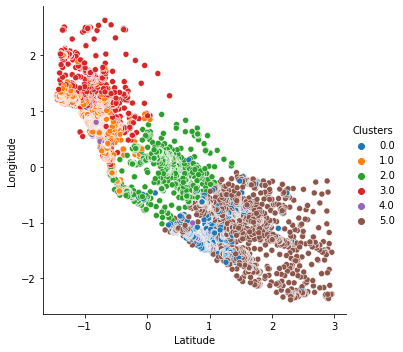

In [80]:
plt.figure(figsize=(10,15))
sns.relplot(data=df_clust,x="Latitude",y="Longitude",hue="Clusters")
plt.show()

<Figure size 720x1080 with 0 Axes>

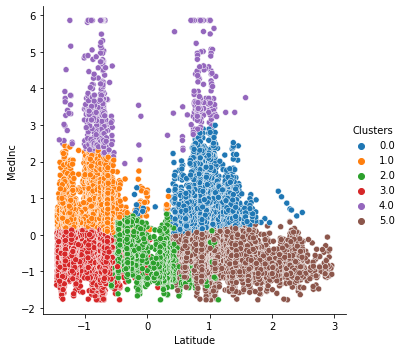

In [77]:
plt.figure(figsize=(10,15))
sns.relplot(data=df_clust,x="Latitude",y="MedInc",hue="Clusters")
plt.show()

<Figure size 720x1080 with 0 Axes>

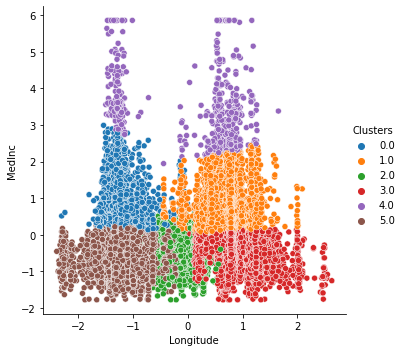

In [79]:
plt.figure(figsize=(10,15))
sns.relplot(data=df_clust,x="Longitude",y="MedInc",hue="Clusters")
plt.show()

Looking at the longitude vs. latitude graph, 6 clusters are not identified, but I would think that there are 3. However, in the visualization of both variables one by one with the mean income, it is possible to see better the existence of 6 groups of households.

**Plus step**: Looking for the best K.

I have decided to test the 'Elbow Rule' to see if there are any 'K' that might improve the model.

Text(0.5, 1.0, 'Regla del codo')

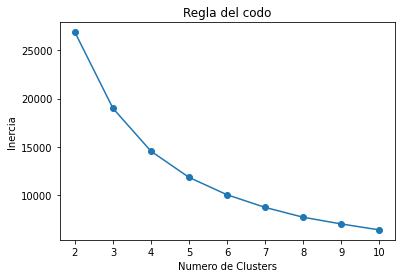

In [81]:
dist = []
clusters_centers = []
for i in range(2, 11):
    km = KMeans(n_clusters=i, init = 'k-means++', n_init = 10, max_iter = 300,random_state = 408)
    _ = km.fit(X) 
    dist.append(km.inertia_)
    clusters_centers.append(km.cluster_centers_)
    
plt.plot(range(2, 11), dist, 'o-');
plt.ylabel('Inercia');
plt.xlabel('Numero de Clusters');
plt.title("Regla del codo")


Perhaps if we had run the model with 3 or 4 clusters, it would have performed better.